In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

In [5]:
print(covid_confirmed.shape)
print(covid_deaths.shape)
print(covid_recovered.shape)

(266, 107)
(266, 107)
(252, 107)


In [6]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,678,712,726,736,750,766,773,782,789,795
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,731,738,738,743,743,743,745,745,747,748
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,25,26,27,27,27,27,30,35,35


In [7]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

In [9]:
covid_confirmed_long.shape

(27398, 6)

In [10]:
covid_confirmed_long.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [11]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

In [12]:
print(covid_df.shape)

covid_df.head()

(27398, 8)


,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


In [13]:
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']

In [14]:
print(covid_df.shape)

covid_df.head()

(27398, 9)


,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0,0.0


In [16]:
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')

In [17]:
covid_df.fillna(0, inplace=True)

In [18]:
covid_df.isna().sum().sum()

0

In [19]:
covid_df.to_csv('covid_df.csv', index=None)

In [20]:
pd.read_csv('covid_df.csv')

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
27393,NaN,Western Sahara,24.215500,-12.885800,5/3/20,6,0,0.0,0.0
27394,NaN,Sao Tome and Principe,0.186360,6.613081,5/3/20,16,1,0.0,0.0
27395,NaN,Yemen,15.552727,48.516388,5/3/20,10,2,0.0,0.0
27396,NaN,Comoros,-11.645500,43.333300,5/3/20,3,0,0.0,0.0


In [21]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0,0.0
1,,Albania,41.1533,20.1683,1/22/20,0,0,0.0,0.0
2,,Algeria,28.0339,1.6596,1/22/20,0,0,0.0,0.0
3,,Andorra,42.5063,1.5218,1/22/20,0,0,0.0,0.0
4,,Angola,-11.2027,17.8739,1/22/20,0,0,0.0,0.0


In [24]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

covid_countries_df

,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.000000,65.000000,5/3/20,2704,85,72600.0,1635.0
1,Albania,,41.153300,20.168300,5/3/20,795,31,80203.0,622.0
2,Algeria,,28.033900,1.659600,5/3/20,4474,463,12362.0,3161.0
3,Andorra,,42.506300,1.521800,5/3/20,748,45,82514.0,690.0
4,Angola,,-11.202700,17.873900,5/3/20,35,2,2818.0,22.0
...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,,31.952200,35.233200,5/3/20,484,4,89250.0,452.0
262,Western Sahara,,24.215500,-12.885800,5/3/20,6,0,10943.0,4.0
263,Yemen,,15.552727,48.516388,5/3/20,10,2,64264.0,0.0
264,Zambia,,-15.416700,28.283300,5/3/20,124,3,47055.0,67.0


In [26]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

covid_countries_df

,Country/Region,Lat,Long,confirmed,deaths,recovered,active
0,Afghanistan,33.000000,65.000000,2704,85,72600.0,1635.0
1,Albania,41.153300,20.168300,795,31,80203.0,622.0
2,Algeria,28.033900,1.659600,4474,463,12362.0,3161.0
3,Andorra,42.506300,1.521800,748,45,82514.0,690.0
4,Angola,-11.202700,17.873900,35,2,2818.0,22.0
...,...,...,...,...,...,...,...
182,West Bank and Gaza,31.952200,35.233200,484,4,89250.0,452.0
183,Western Sahara,24.215500,-12.885800,6,0,10943.0,4.0
184,Yemen,15.552727,48.516388,10,2,64264.0,0.0
185,Zambia,-15.416700,28.283300,124,3,47055.0,67.0


In [27]:
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

covid_countries_df

,Country/Region,confirmed,deaths,recovered,active
0,Afghanistan,2704,85,72600.0,1635.0
1,Albania,795,31,80203.0,622.0
2,Algeria,4474,463,12362.0,3161.0
3,Andorra,748,45,82514.0,690.0
4,Angola,35,2,2818.0,22.0
...,...,...,...,...,...
182,West Bank and Gaza,484,4,89250.0,452.0
183,Western Sahara,6,0,10943.0,4.0
184,Yemen,10,2,64264.0,0.0
185,Zambia,124,3,47055.0,67.0


In [51]:
covid_countries_df[covid_countries_df['Country/Region'] == "France"]

,Country/Region,confirmed,deaths,recovered,active
62,France,169258,24900,448796.0,145201.0


In [79]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()

In [80]:
covid_countries_date_df

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
0,Afghanistan,1/22/20,33.000000,65.000000,0,0,0.0,0.0
1,Albania,1/22/20,41.153300,20.168300,0,0,0.0,0.0
2,Algeria,1/22/20,28.033900,1.659600,0,0,0.0,0.0
3,Andorra,1/22/20,42.506300,1.521800,0,0,0.0,0.0
4,Angola,1/22/20,-11.202700,17.873900,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
19256,Western Sahara,5/3/20,24.215500,-12.885800,6,0,0.0,0.0
19257,Sao Tome and Principe,5/3/20,0.186360,6.613081,16,1,0.0,0.0
19258,Yemen,5/3/20,15.552727,48.516388,10,2,0.0,0.0
19259,Comoros,5/3/20,-11.645500,43.333300,3,0,0.0,0.0


In [81]:
covid_FR = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'France']

covid_FR

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
56,France,1/22/20,91.3624,59.7192,0,0,0.0,0.0
243,France,1/23/20,91.3624,59.7192,0,0,0.0,0.0
430,France,1/24/20,91.3624,59.7192,2,0,0.0,2.0
617,France,1/25/20,91.3624,59.7192,3,0,0.0,3.0
804,France,1/26/20,91.3624,59.7192,3,0,0.0,3.0
...,...,...,...,...,...,...,...,...
18382,France,4/29/20,91.3624,59.7192,166543,24090,0.0,0.0
18569,France,4/30/20,91.3624,59.7192,167299,24379,0.0,0.0
18756,France,5/1/20,91.3624,59.7192,167305,24597,0.0,0.0
18943,France,5/2/20,91.3624,59.7192,168518,24763,0.0,0.0


In [60]:
def plot_country_global_info(country):
    country_info = covid_countries_df[covid_countries_df['Country/Region'] == country]
    
    country_info_long = country_info.melt(value_vars=['active', 'deaths', 'recovered'],
                                          var_name="status",
                                          value_name="count")

    country_info_long['upper'] = 'Confirmed cases'
    
    fig = px.treemap(country_info_long, path=["upper", "status"], values="count",
                     title=f"Total COVID-19 confirmed cases in {country}",
                     color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
                     template='plotly_dark')

    fig.data[0].textinfo = 'label+text+value'

    fig.show()

In [62]:
def plot_country_cases_over_time(country, log):
    country_date_info = covid_countries_date_df[covid_countries_date_df['Country/Region'] == country]
    
    fig, ax = plt.subplots(figsize=(16, 6))

    if log:
        ax.set(yscale="log")
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
        plt.title("(logarithmic scale)", color='white')

    sns.lineplot(x=country_date_info['date'], y=country_date_info['confirmed'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['deaths'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['recovered'], sort=False, linewidth=2)
    sns.lineplot(x=country_date_info['date'], y=country_date_info['active'], sort=False, linewidth=2)
                
    ax.lines[0].set_linestyle("--")

    plt.suptitle(f"COVID-19 cases in {country} over the time", fontsize=16, fontweight='bold', color='white')

    plt.xticks(rotation=45)
    plt.ylabel('Number of cases')

    ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

    plt.show()

In [92]:
def get_country_covid_info(country, log=False):
    plot_country_global_info(country)
    
    plot_country_cases_over_time(country, log)

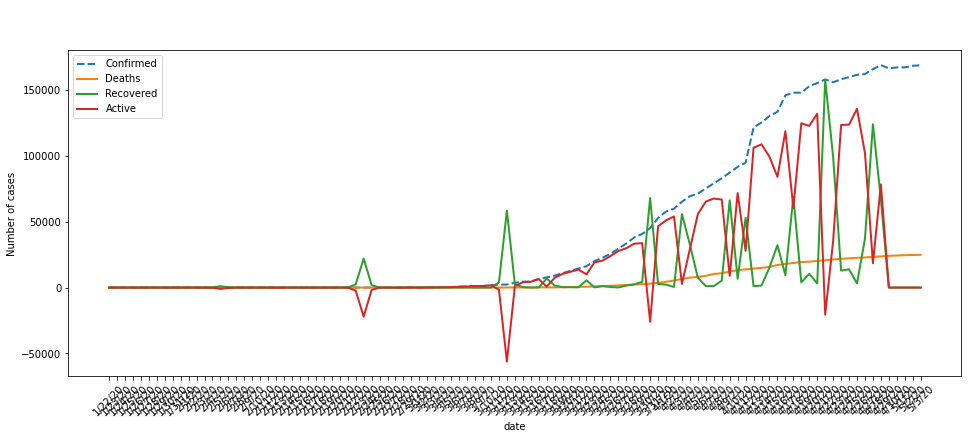

In [94]:
get_country_covid_info('France')

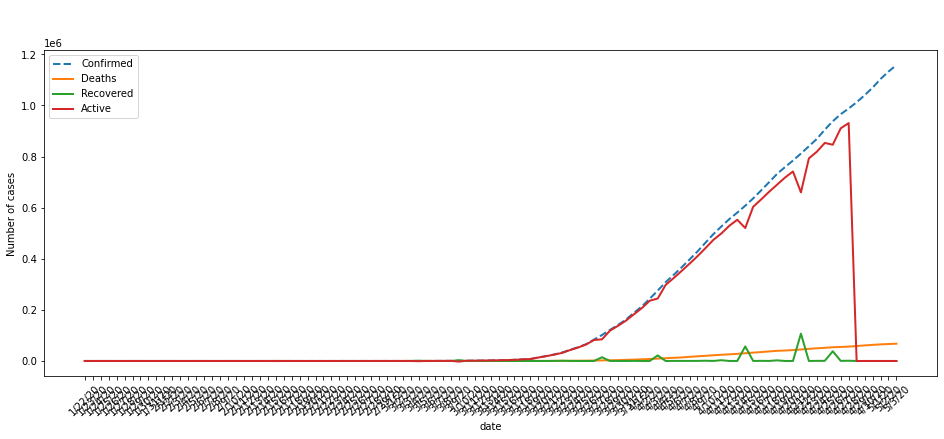

In [95]:
get_country_covid_info('US')